# CMS och Open Data

CERN producerar oavbrutet stora mängder data. CMS-experimentet (Compact Muon Solenoid) har publicerat sina resultat öppet, och de här mängderna av öppna data är det som har startat [detta projekt](https://avoin-data-opas.github.io/se/). I den här övningen bekantar vi oss med olika sätt att förklara dessa data. Det här ger den studerande ett ypperligt tillfälle att prova på verkliga vetenskapliga metoder med äkta mätresultat.

### 1. Datan som används

In [1]:
# Hej, jag är en kodcell! Kommentarer börjar med # och påverkar inte koden, men gör den mer läsbar.
# Börja med att köra denna cell. Den ber Python hämta in rätt funktionspaket, så att resten av kodcellerna kan tolkas.

import pandas as pd               # Verktyg för att läsa datafiler
import numpy as np                # Verktyg för beräkningar
import matplotlib.pyplot as plt   # Verktyg för grafer och diagram
import random as rand             
from scipy.stats import norm
import matplotlib.mlab as mlab

%matplotlib inline


In [2]:
# Vi läser in mätdata från några kollisioner.

tvillingmyoner = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Dimuon_DoubleMu.csv')
jpsi = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Jpsimumu_Run2011A.csv')

In [3]:
# Vi kontrollerar hur datan ser ut.
# .head()-kommandot visar de första raderna av tabellen.

tvillingmyoner.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


In [4]:
# Vi kontrollerar hur många händelser som är registrerade här. (antal rader i tabellerna)

print (len(tvillingmyoner))
print (len(jpsi))

100000
31892


### 2. Invariant massa

Invariant massa är en matematisk storhet, med vars hjälp vi kan klargöra hurudana partikelkollisioner som kan skapa hurudana partiklar, rörelsemängder och energier. 

Den är av stor betydelse inom partikelforskning, där vi ofta undrar över vilka förhållanden som kan skapa vilka partiklar.

Ett histogram är ett användbart verktyg för en sådan undersökning.

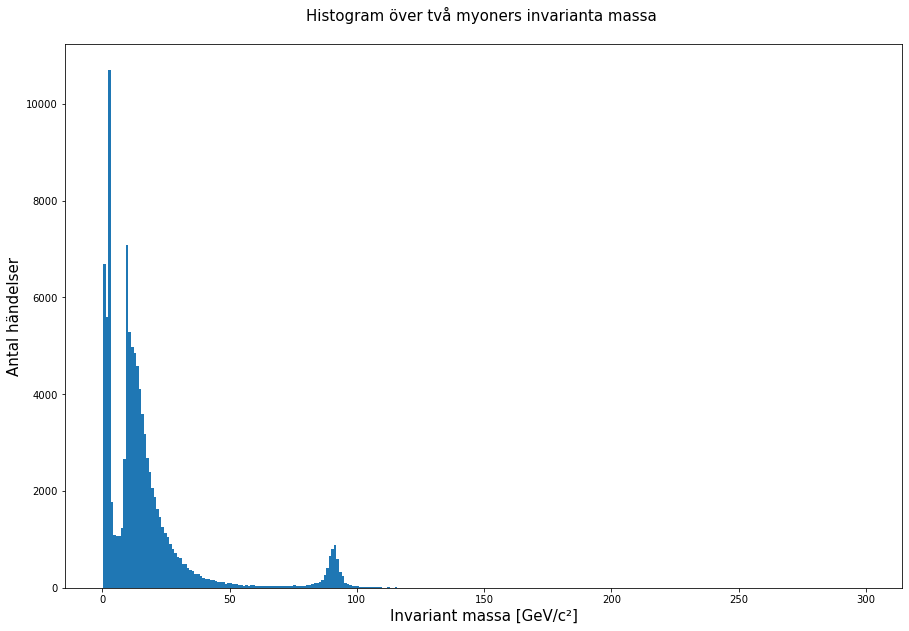

In [5]:
# Vi ska rita ett histogram:

fig = plt.figure(figsize=(15, 10))
plt.hist(tvillingmyoner.M, bins=300)

# Dessa rader anger diagrammets och axlarnas titlar.

plt.xlabel('Invariant massa [GeV/c²]', fontsize=15)
plt.ylabel('Antal händelser', fontsize=15)
plt.title('Histogram över två myoners invarianta massa \n', fontsize=15) # \n Skapar en ny rad

# Slutligen ber vi programmet visa diagrammet.

plt.show()

Det finns många saker vi kan se i grafen, men här ska vi främst undersöka den lilla toppen mellan 80 och 100 GeV.

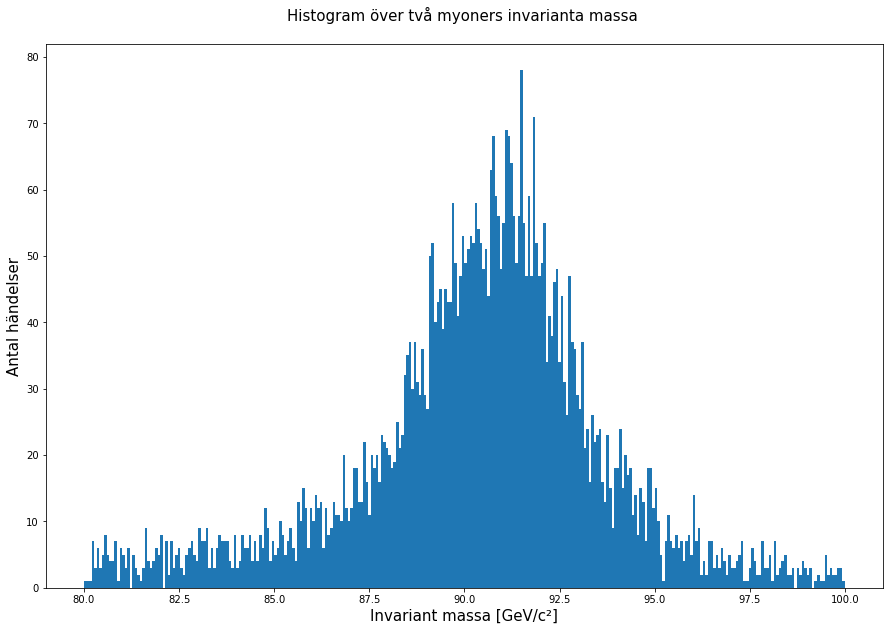

In [6]:
# Vi gör ett nytt histogram på samma sätt, men begränsar datan till intervallet 80-100:

fig = plt.figure(figsize=(15, 10))
plt.hist(tvillingmyoner.M, bins=300, range=(80,100))


plt.xlabel('Invariant massa [GeV/c²]', fontsize=15)
plt.ylabel('Antal händelser', fontsize=15)
plt.title('Histogram över två myoners invarianta massa \n', fontsize=15)


plt.show()

Här ser vi att toppen befinner sig ungefär vid 91 GeV, vilket matchar den invarianta massan för en **Z-boson**.

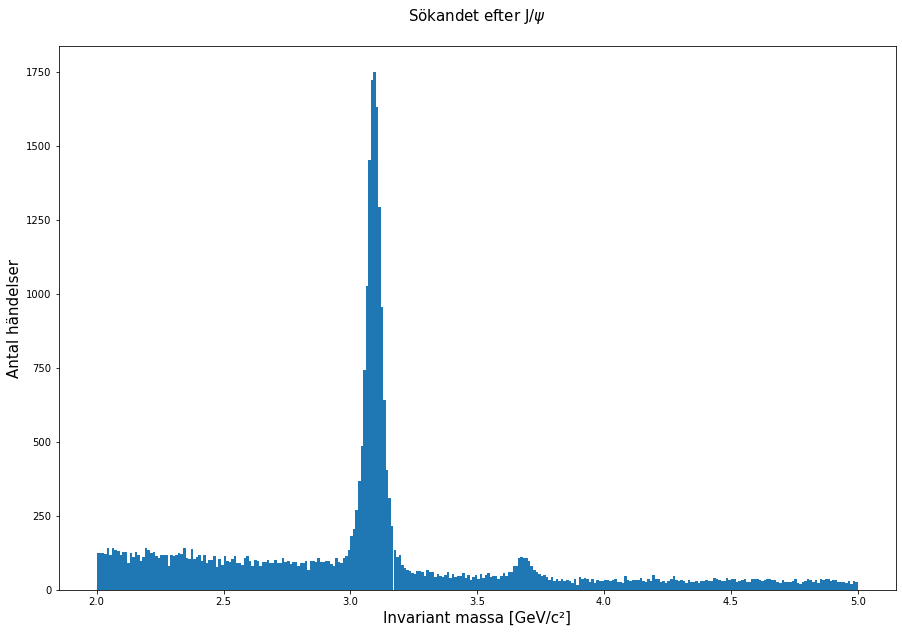

In [7]:
# Vi gör också ett histogram för J/psi.

fig = plt.figure(figsize=(15, 10))
plt.hist(jpsi.M, bins=300)

# Dessa rader anger diagrammets och axlarnas titlar.

plt.xlabel('Invariant massa [GeV/c²]', fontsize=15)
plt.ylabel('Antal händelser', fontsize=15)
plt.title('Sökandet efter J/$\psi$ \n', fontsize=15)

plt.show()

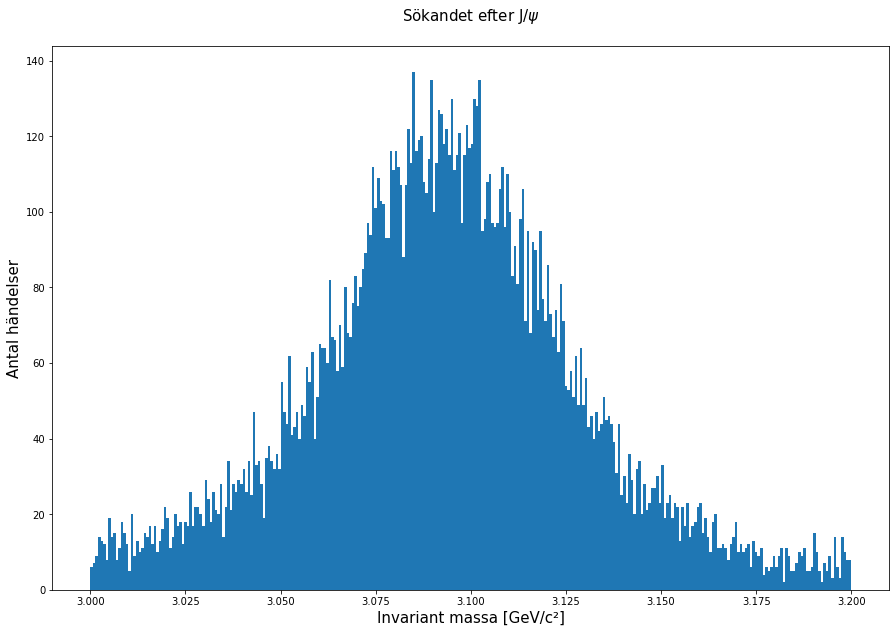

In [8]:
# Vi begränsar dessa data till den stora toppen (mellan 3 och 3.2 GeV)

fig = plt.figure(figsize=(15, 10))
plt.hist(jpsi.M, bins=300, range=(3,3.2))


plt.xlabel('Invariant massa [GeV/c²]', fontsize=15)
plt.ylabel('Antal händelser', fontsize=15)
plt.title('Sökandet efter J/$\psi$ \n', fontsize=15)


plt.show()

### 3. Uppdelning och jämförelser

Ibland är det intressant att undersöka hur olika delar av datan påverkar slutresultatet. Här ska vi dela in datan enligt de observerade partiklarnas energi.

In [9]:
grans = 150 
# Variabler i python kan inte innehålla åäö.

hogenergi = tvillingmyoner[(tvillingmyoner.E1 + tvillingmyoner.E2) >= grans]
lagenergi = tvillingmyoner[(tvillingmyoner.E1 + tvillingmyoner.E2) < grans]

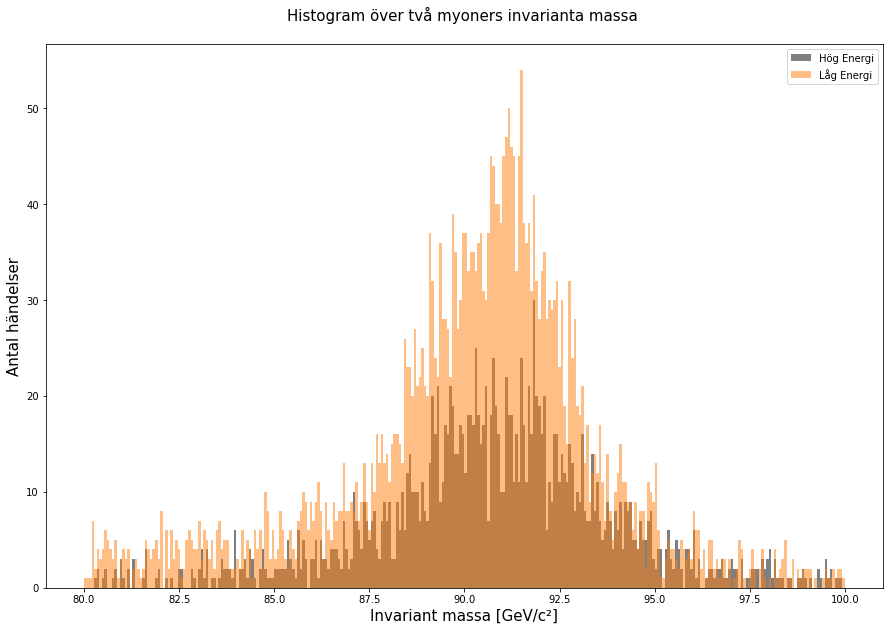

In [10]:
fig = plt.figure(figsize=(15, 10))
plt.hist(hogenergi.M, bins=300, range=(80,100), alpha=0.5, label='Hög Energi',facecolor='k')
plt.hist(lagenergi.M, bins=300, range=(80,100), alpha=0.5, label='Låg Energi')

plt.xlabel('Invariant massa [GeV/c²]', fontsize=15)
plt.ylabel('Antal händelser', fontsize=15)
plt.title('Histogram över två myoners invarianta massa \n', fontsize=15)
plt.legend (loc='upper right')
# legend skapar en referensruta. Referenserna i rutan är de "labels" vi har definierat ovan.

plt.show()

Det ser ut som att händelser med låg energi ger upphov till fler intressanta händelser, men lägg märke till att fördelningen mellan hög- och lågenergihändelser inte nödvändigtvis är jämn. Vi kontrollerar den balansen:

In [11]:
print (len(hogenergi))
print (len(lagenergi))

2106
97894


Vi märker att mängden lågenergihändelser är mångdubbelt större. Högenergihändelserna, med sitt mycket mindre antal, orsakar nästan lika många intressanta händelser.

Vad händer om vi använder 100 som gräns istället? Pröva själv att ändra variabeln **grans** till 100 och köra cellerna igen.

### 4. Pseudorapiditet

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pseudorapidity_plot.svg/695px-Pseudorapidity_plot.svg.png"
align = "left" style = "height:300px">

Pseudorapiditet, $\eta$, är ett mått på den observerade partikelns avvikelse från partikelstrålen. Partiklar med $\eta$-värden äver 2,5 är så nära strålen att de är svåra att urskilja, och därför uppmäter vi inte högre värden än så.

Från pseudorapiditeten $\eta \equiv -ln[tan\frac{\theta}{2}]$ kan vi också ta reda på kollisionernas vinkelfördelning, vilket kan hjälpa till med visualiseringen.

I bilden tänker vi oss att strålen går vågrätt, från vänster till höger, så att $\eta = 0$ står vinkelrätt mot strålen.



In [12]:
prapmyon = pd.concat([tvillingmyoner['eta1'],tvillingmyoner['eta2']])
prapjpsi = pd.concat([jpsi.eta1,jpsi.eta2])

vinkelmyon = prapmyon.copy()
vinkelmyon[:]=[2*np.arctan(np.exp(x))*360/(2*np.pi) for x in vinkelmyon]

vinkeljpsi = prapjpsi.copy()
vinkeljpsi[:]=[2*np.arctan(np.exp(x))*360/(2*np.pi) for x in vinkeljpsi]

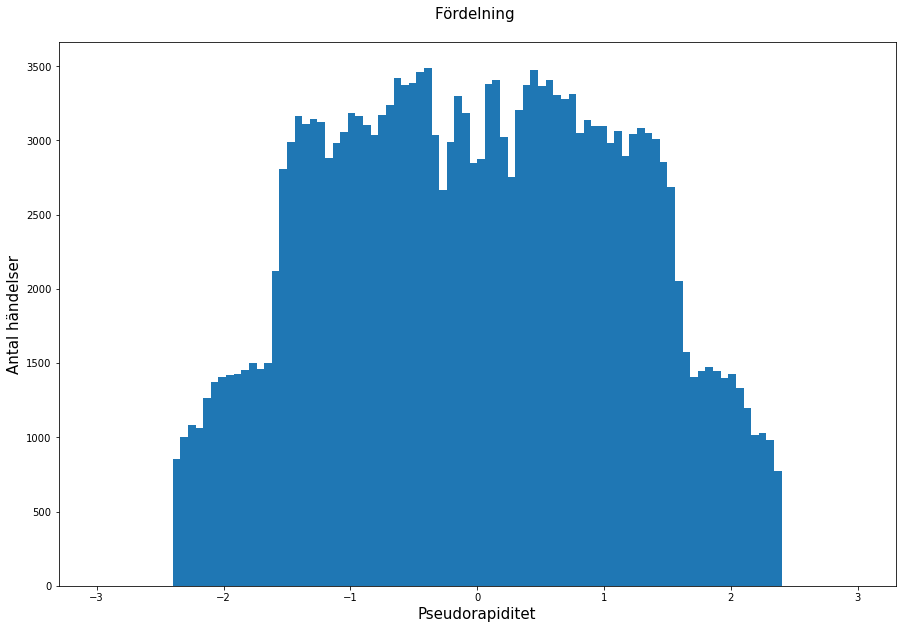

In [13]:
fig = plt.figure(figsize=(15, 10))
plt.hist(prapmyon, bins=100, range=(-3,3))

plt.xlabel('Pseudorapiditet', fontsize=15)
plt.ylabel('Antal händelser', fontsize=15)
plt.title('Fördelning \n', fontsize=15)

plt.show()


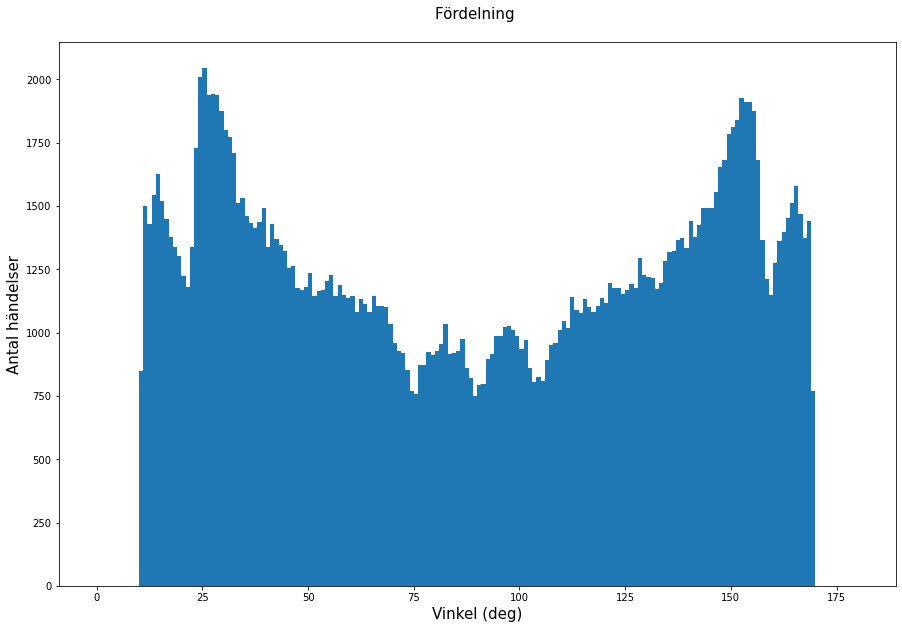

In [14]:
fig = plt.figure(figsize=(15, 10))
plt.hist(vinkelmyon, bins=180, range=(0,180))

plt.xlabel('Vinkel (deg)', fontsize=15)
plt.ylabel('Antal händelser', fontsize=15)
plt.title('Fördelning \n', fontsize=15)

plt.show()

Diagrammet har en tydlig symmetri. Vad kan orsaka den?

Partikeln har en trasversell rörelsemängd $p_T$ (Den komponent av rörelsemängden som ligger vinkelrätt mot strålen). Vi undersöker förhållandet mellan $p_T$ och pseudorapiditeten.

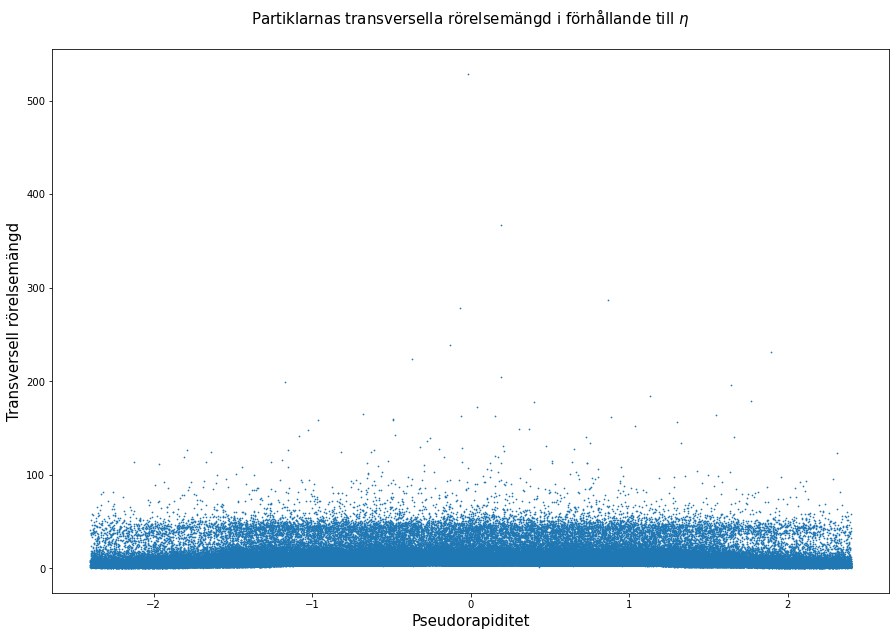

In [15]:
fig = plt.figure(figsize=(15, 10))
avvikelser = pd.concat([tvillingmyoner.pt1,tvillingmyoner.pt2])
plt.scatter(prapmyon, avvikelser, s=0.5)

# plt.ylim(0,6)
# Kör först cellen så att raden ovan är en kommentar. Ta sedan bort # framför ylim och kör cellen igen.

plt.title('Partiklarnas transversella rörelsemängd i förhållande till $\eta$ \n', fontsize=15)
plt.xlabel('Pseudorapiditet', fontsize=15)
plt.ylabel('Transversell rörelsemängd', fontsize=15)

plt.show()

### 5. Resolution

Pseudorapiditeten visar de observerade partiklarnas rörelseriktning, vilket i viss mån avgör hur noggranna resultat vi kan få. Av tekniska orsaker går gränsen för våra mätningar vid $\eta = \left | 2,5 \right |$. Mätresultat närmare mitten är mer betydande, så som diagrammen nedan visar.

In [16]:
grans = 1.5

stort_eta = tvillingmyoner[(abs(tvillingmyoner.eta1) >= grans) & (abs(tvillingmyoner.eta2) >= grans)]
litet_eta = tvillingmyoner[(abs(tvillingmyoner.eta1) < grans) & (abs(tvillingmyoner.eta2) < grans)]

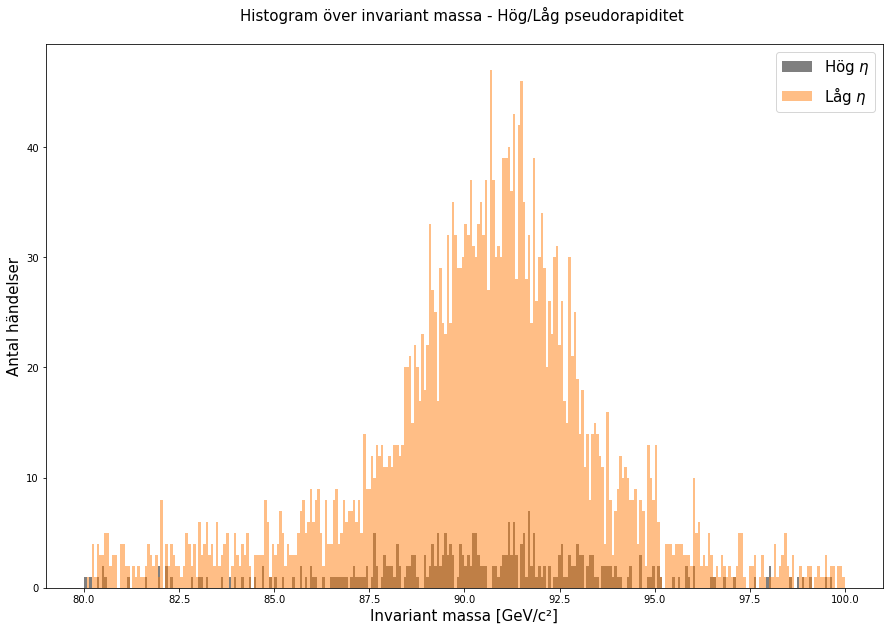

In [17]:
fig = plt.figure(figsize=(15, 10))
plt.hist(stort_eta.M, bins=300, range=(80,100), alpha=0.5, label='Hög $\eta$', facecolor='black')
plt.hist(litet_eta.M, bins=300, range=(80,100), alpha=0.5, label='Låg $\eta$')

plt.xlabel('Invariant massa [GeV/c²]', fontsize=15)
plt.ylabel('Antal händelser', fontsize=15)
plt.title('Histogram över invariant massa - Hög/Låg pseudorapiditet \n', fontsize=15)
plt.legend (loc='upper right', fontsize=15)

plt.show()

In [18]:
print (len(stort_eta))
print (len(litet_eta))

8491
65518


### 6. Anpassning och statistik

I Python finns inbyggda funktioner för beräkning av medeltal, varians eller standardavvikelse. Med hjälp av dem kan vi också anpassa en normalfördelningskurva till resultaten, och se hur bra de passar in.

C:\Users\Lukas\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:354: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\Lukas\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Lukas\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:359: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


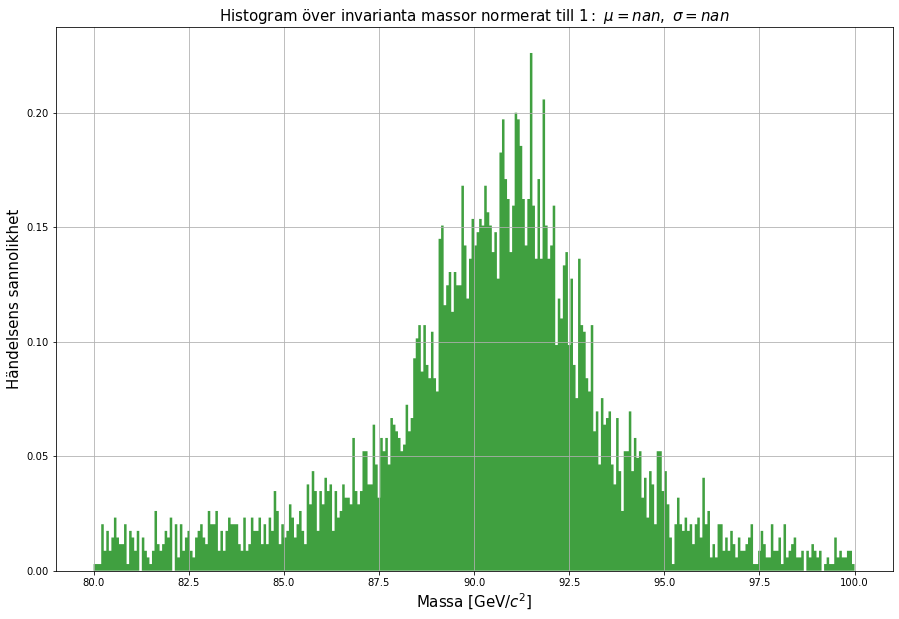

In [20]:
ovregrans = 87
undregrans = 95

begransat = tvillingmyoner[(tvillingmyoner.M > undregrans) & (tvillingmyoner.M < ovregrans)]

fig = plt.figure(figsize=(15, 10))

visning_undre = 80
visning_ovre = 100

omrade = tvillingmyoner[(tvillingmyoner.M > visning_undre) & (tvillingmyoner.M < visning_ovre)]

koeff = len(bit)/len(omrade)
(mu, sigma) = norm.fit(begransat.M)

n, bins, patches = plt.hist(tvillingmyoner.M, 300, density = 1, facecolor = 'green', alpha=0.75, histtype='stepfilled',
                            range=(visning_undre,visning_ovre))

y = koeff*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Massa [GeV/$c^2$]',fontsize=15)
plt.ylabel('Händelsens sannolikhet', fontsize=15)
plt.title(r'$\mathrm{Histogram\ över\ invarianta \ massor\ normerat\ till \ 1:}\ \mu=%.3f,\ \sigma=%.3f$'
          %(mu,sigma),fontsize=15)
plt.grid(True)

plt.show()